In [4]:
import pandas as pd

filename = '/Users/harshavadlamudi/Downloads/Statistical data from state/Tabelle01.csv'  # Replace with your CSV file path

df = pd.read_csv(filename, encoding='latin1', delimiter=';')  # for semicolon

print(df)


     Bevölkerungsentwicklung seit 1840  \
0                                  NaN   
1                         Volkszählung   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
2181                           9780145   
2182                           9780146   
2183                           9780147   
2184                           9780444   
2185                               NaN   

                                      Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0     Gemeinden (einschl. gemeindefreie Gebiete)          NaN        NaN   
1                                            NaN          NaN        NaN   
2                                            NaN          NaN        NaN   
3                                            NaN  Bevölkerung        NaN   
4                                            NaN     Stichtag   Stichtag   
...                                    

In [17]:
import matplotlib.pyplot as plt

# Select row for municipality (replace with actual name in your file)
municipality = 'Wiggensbach, M'
row = df[df.iloc[:, 0] == municipality]

# Extract years from column names (assuming they are dates)
years = df.columns[1:]

# Extract population values for the row, convert to numeric (ignore errors)
pop_values = pd.to_numeric(row.iloc[0, 1:], errors='coerce')

# Plot
plt.figure(figsize=(10,6))
plt.plot(years, pop_values, marker='o')
plt.title(f'Population Development of {municipality}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


IndexError: single positional indexer is out-of-bounds

In [18]:
print(df.head())
print(df.columns)


  Bevölkerungsentwicklung seit 1840  \
0                               NaN   
1                      Volkszählung   
2                               NaN   
3                               NaN   
4                               NaN   

                                   Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0  Gemeinden (einschl. gemeindefreie Gebiete)          NaN        NaN   
1                                         NaN          NaN        NaN   
2                                         NaN          NaN        NaN   
3                                         NaN  Bevölkerung        NaN   
4                                         NaN     Stichtag   Stichtag   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN        NaN  ...   
2        NaN        NaN        NaN        NaN        NaN        NaN  ...   
3        NaN        Na

In [19]:
df = pd.read_csv(filename, encoding='latin1', delimiter=';', skiprows=6)

print(df.head())
print(df.columns)


   Unnamed: 0      Unnamed: 1 01.12.1840 01.12.1871 01.12.1900 16.06.1925  \
0         NaN             NaN     Anzahl     Anzahl     Anzahl     Anzahl   
1         9.0          Bayern    3802515    4292484    5414831    6451380   
2        91.0      Oberbayern     711861     865178    1351086    1727483   
3        92.0    Niederbayern     502934     578829     652139     726707   
4        93.0       Oberpfalz     459571     501950     558394     636845   

  17.05.1939 13.09.1950 06.06.1961 27.05.1970  ...  Unnamed: 50  Unnamed: 51  \
0     Anzahl     Anzahl     Anzahl     Anzahl  ...          NaN          NaN   
1    7084086    9184466    9515479   10479386  ...   60,8431467  76,75167966   
2    1999048    2541896    2831744    3324104  ...  49,35413577   77,0727895   
3     755980    1041333     927724     977166  ...  56,03920999  63,13670249   
4     694742     906822     898580     963833  ...  51,80082559  57,62579979   

   Unnamed: 52  Unnamed: 53  Unnamed: 54  Unnamed: 55  U

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

filename = '/Users/harshavadlamudi/Downloads/Statistical data from state/Tabelle01.csv'

# Load CSV skipping 6 rows, delimiter may be ';' or ',' — check your file
df = pd.read_csv(filename, encoding='latin1', delimiter=';', skiprows=6)

# Remove the first row with 'Anzahl' labels (it’s not data)
df = df[df['Unnamed: 1'] != 'Anzahl']

# Select the row with Bayern
bayern_row = df[df['Unnamed: 1'] == 'Bayern'].iloc[0]

# Extract year columns (date columns start from 2nd or 3rd column)
year_cols = df.columns[2:]  # Adjust if necessary

# Convert population data to numeric (comma to dot, then to float)
populations = bayern_row[year_cols].str.replace(',', '.').astype(float)

# Convert date strings to just years (extract year from date string)
years = [col.split('.')[-1] for col in year_cols]

# Plot
plt.figure(figsize=(10,6))
plt.plot(years, populations, marker='o')
plt.title('Population Development of Bayern')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'Bayern'

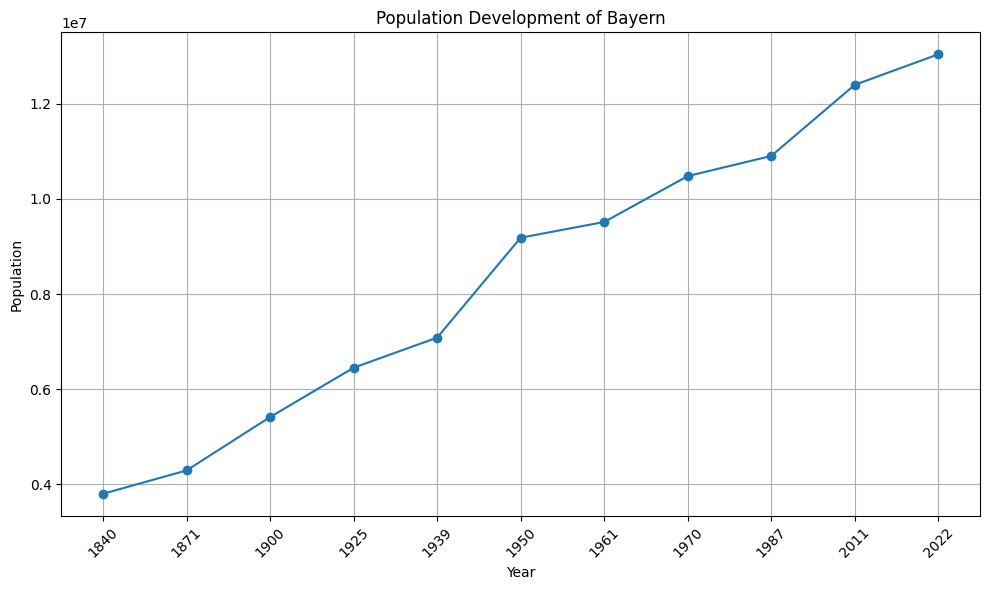

In [21]:
import re
import matplotlib.pyplot as plt

# Identify date columns by regex
date_cols = [col for col in df.columns if re.match(r'\d{2}\.\d{2}\.\d{4}', col)]

# Select the Bayern row
bayern_row = df[df['Unnamed: 1'] == 'Bayern'].iloc[0]

# Extract the population values from those date columns
populations = bayern_row[date_cols].astype(float)

# Extract years (the last 4 digits from date strings)
years = [col.split('.')[-1] for col in date_cols]

# Plot
plt.figure(figsize=(10,6))
plt.plot(years, populations, marker='o')
plt.title('Population Development of Bayern')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
